In [117]:
import numpy as np

In [118]:
### Load and normalize our data

In [119]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


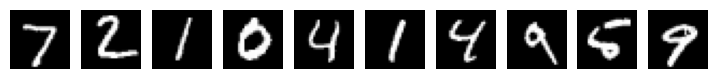

In [120]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
from tensorflow import keras

pretrained_model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/initially_trained_autoencoder.h5')

313/313 [==============================] - 4s 12ms/step


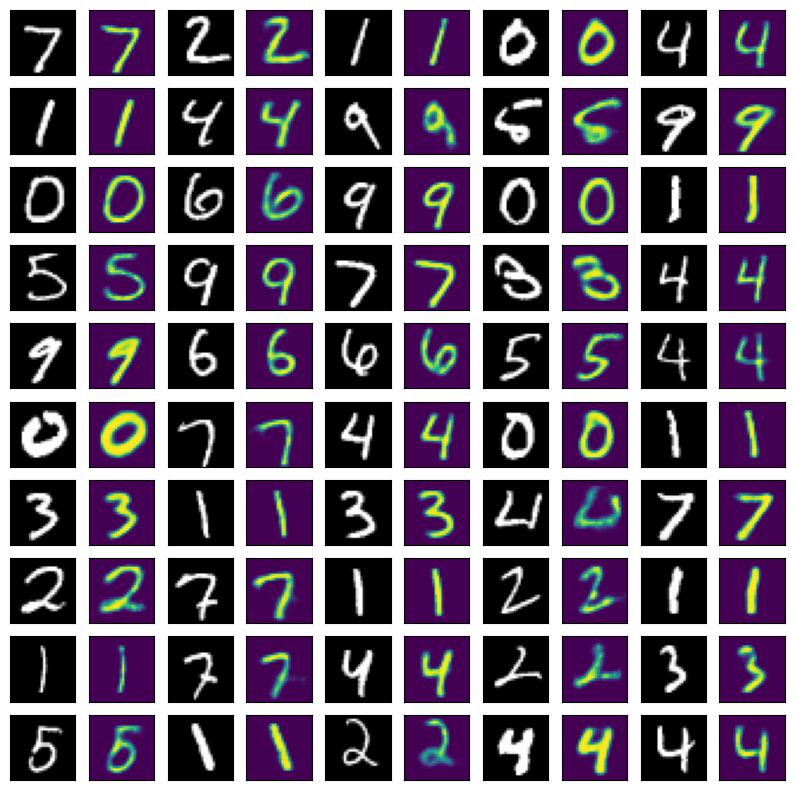

In [123]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [124]:
# Autoencoder

In [125]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [126]:
# load a sample image
image1 = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/Image1.png', target_size=(28, 28), color_mode = "grayscale")
image2 = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/Image2.png', target_size=(28, 28), color_mode = "grayscale")
image3 = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/Image3.png', target_size=(28, 28), color_mode = "grayscale")
image4 = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/Image4.png', target_size=(28, 28), color_mode = "grayscale")
image5 = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/Image5.png', target_size=(28, 28), color_mode = "grayscale")

In [127]:
def image_preprocessing(I):
  input_arr = tf.keras.utils.img_to_array(I)
  input_arr = input_arr/ 255 # normalize between 0 and 1
  input_arr = input_arr.reshape(784)
  input_arr = np.array([input_arr])
  return(input_arr)

In [128]:
I1 = image_preprocessing(image1)
I2 = image_preprocessing(image2)
I3 = image_preprocessing(image3)
I4 = image_preprocessing(image4)
I5 = image_preprocessing(image5)

In [129]:
predictions = pretrained_model.predict(I1)
print(predictions.shape)

1/1 [==============================] - 0s 23ms/step
(1, 784)


1/1 [==============================] - 0s 23ms/step


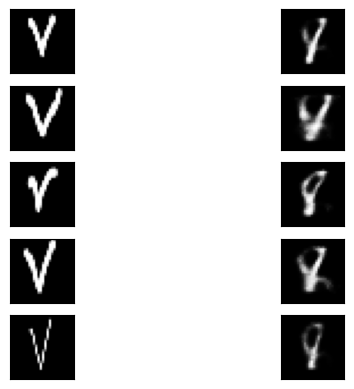

In [130]:

#####################################
# display the two images side by side
# 
plt.subplot(5,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image1, cmap="gray")


plt.subplot(5,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(pretrained_model.predict(I1).reshape(28,28), cmap="gray")
#########################################################
plt.subplot(5,2,3)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image2, cmap="gray")


plt.subplot(5,2,4)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(pretrained_model.predict(I2).reshape(28,28), cmap="gray")
#########################################################
plt.subplot(5,2,5)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image3, cmap="gray")


plt.subplot(5,2,6)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(pretrained_model.predict(I3).reshape(28,28), cmap="gray")
#########################################################
plt.subplot(5,2,7)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image4, cmap="gray")


plt.subplot(5,2,8)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(pretrained_model.predict(I4).reshape(28,28), cmap="gray")
#########################################################
plt.subplot(5,2,9)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image5, cmap="gray")


plt.subplot(5,2,10)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(pretrained_model.predict(I5).reshape(28,28), cmap="gray")
#########################################################


plt.show()

In [131]:
## resampling the 5 images and adding it into the testing and training data sets

In [132]:
#### reshaping the images

In [133]:
I1 = I1.reshape(784)
I2 = I2.reshape(784)
I3 = I3.reshape(784)
I4 = I4.reshape(784)
I5 = I5.reshape(784)

In [134]:
## shuffling the train data
np.random.shuffle(train_images)

In [135]:
## creating Samples for each of the Images
I1_images = [I1 for _ in range(135)]
I2_images = [I2 for _ in range(135)]
I3_images = [I3 for _ in range(135)]
I4_images = [I4 for _ in range(135)]
I5_images = [I5 for _ in range(135)]

In [136]:
I1_images[0].shape

(784,)

In [137]:
train_images[:500][0].shape

(784,)

In [138]:
new_image_set = np.vstack((train_images[:300],I1_images,I2_images,I3_images,I4_images,I5_images))
np.random.shuffle(new_image_set)

In [139]:
new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

In [140]:
new_images_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [141]:
new_images_test 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [142]:
### Try to continue training the model on the original 10 digits and with the new symbol mixed in   

In [143]:
from tensorflow import keras
updated_model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/initially_trained_autoencoder.h5')

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)

Epoch 1/15
2/2 [==============================] - 1s 270ms/step - loss: 0.1596 - val_loss: 0.1205
Epoch 2/15
2/2 [==============================] - 0s 123ms/step - loss: 0.1186 - val_loss: 0.1037
Epoch 3/15
2/2 [==============================] - 0s 213ms/step - loss: 0.1036 - val_loss: 0.0940
Epoch 4/15
2/2 [==============================] - 0s 119ms/step - loss: 0.0921 - val_loss: 0.0793
Epoch 5/15
2/2 [==============================] - 0s 119ms/step - loss: 0.0781 - val_loss: 0.0729
Epoch 6/15
2/2 [==============================] - 0s 189ms/step - loss: 0.0703 - val_loss: 0.0661
Epoch 7/15
2/2 [==============================] - 0s 108ms/step - loss: 0.0642 - val_loss: 0.0635
Epoch 8/15
2/2 [==============================] - 0s 107ms/step - loss: 0.0611 - val_loss: 0.0616
Epoch 9/15
2/2 [==============================] - 0s 122ms/step - loss: 0.0589 - val_loss: 0.0610
Epoch 10/15
2/2 [==============================] - 0s 111ms/step - loss: 0.0576 - val_loss: 0.0599
Epoch 11/15
2/2 [==

In [144]:
### Test the model on the original test set

313/313 [==============================] - 2s 5ms/step


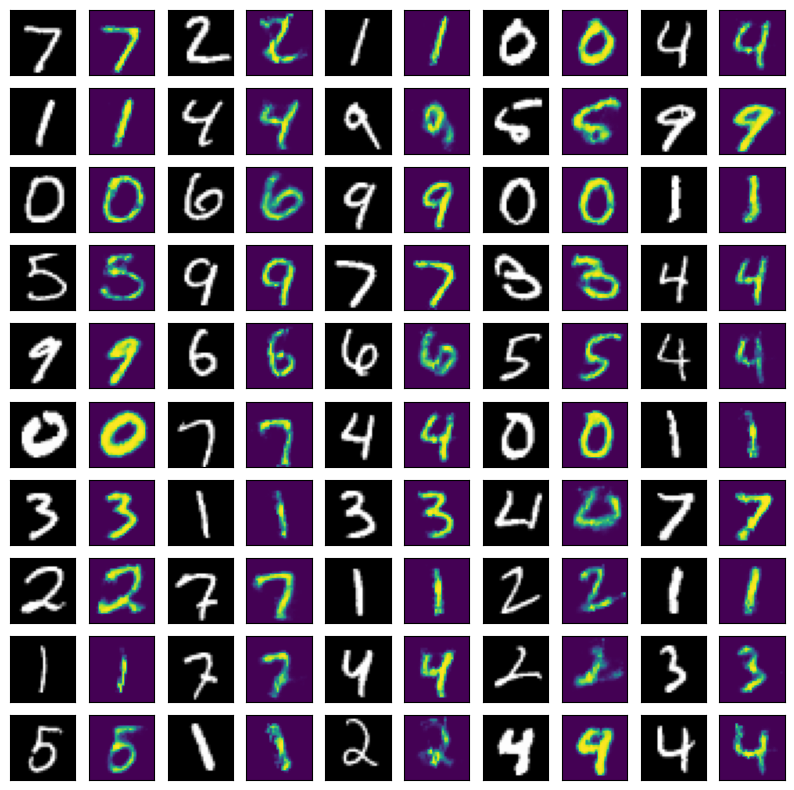

In [145]:
reconstructed_images = updated_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [146]:
I1 = image_preprocessing(image1)
I2 = image_preprocessing(image2)
I3 = image_preprocessing(image3)
I4 = image_preprocessing(image4)
I5 = image_preprocessing(image5)

1/1 [==============================] - 0s 20ms/step


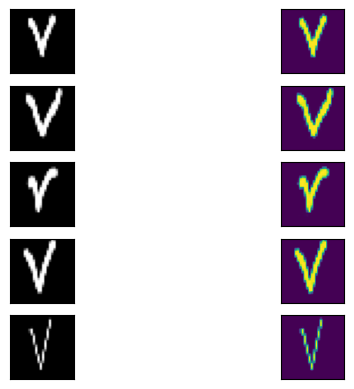

In [147]:

#####################################
# display the two images side by side
# 
plt.subplot(5,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image1, cmap="gray")


plt.subplot(5,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(updated_model.predict(I1).reshape(28,28))
#########################################################
plt.subplot(5,2,3)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image2, cmap="gray")


plt.subplot(5,2,4)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(updated_model.predict(I2).reshape(28,28))
#########################################################
plt.subplot(5,2,5)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image3, cmap="gray")


plt.subplot(5,2,6)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(updated_model.predict(I3).reshape(28,28))
#########################################################
plt.subplot(5,2,7)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image4, cmap="gray")


plt.subplot(5,2,8)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(updated_model.predict(I4).reshape(28,28))
#########################################################
plt.subplot(5,2,9)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image5, cmap="gray")


plt.subplot(5,2,10)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(updated_model.predict(I5).reshape(28,28))
#########################################################


plt.show()

In [ ]:
updated_model.save('updated_model.h5')

In [ ]:
updated_model.save('initially_trained_autoencoder.h5')

In [ ]:
/content/updated_model.h5